In [1]:
%matplotlib inline
import imageio as io
from os import listdir, path
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
image_names = []
mask_names = []
IMAGE_DIR = 'train_image'

for name in listdir(path.join(IMAGE_DIR, 'original')):
    image_names.append(name)
    mask_names.append(name+'_mask.png')

images = []
masks = []
for im_n, ms_n in zip(image_names, mask_names):
    images.append(io.imread(path.join(IMAGE_DIR, 'original', im_n)))
    masks.append(io.imread(path.join(IMAGE_DIR, 'mask', ms_n)))

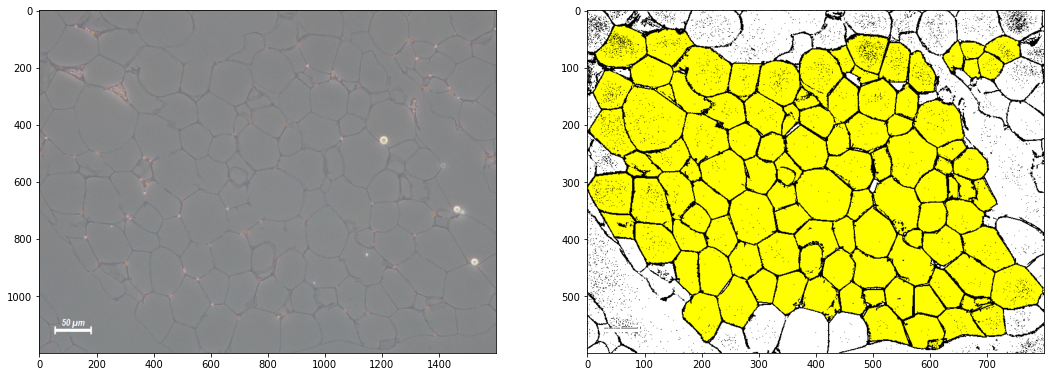

In [3]:
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(1,2,1)
ax.imshow(images[9])
ax = fig.add_subplot(1,2,2)
ax.imshow(masks[9])
plt.show()

In [3]:
print(images[0].shape)
print(masks[0].shape)

(1200, 1600, 3)
(600, 800, 3)


In [4]:
cut_image = []
cut_mask = []
offset = 0
target_color = [255,255,0]

for image, mask in zip(images, masks):
    for r in range(mask.shape[0]):
        if np.any(np.all(mask[r]==target_color,axis=-1)):
            row_begin = max(r - offset,0)
            break
    for r in range(mask.shape[0]-1,-1,-1):
        if np.any(np.all(mask[r]==target_color,axis=-1)):
            row_end = r + offset
            break
    for c in range(mask.shape[1]):
        if np.any(np.all(mask[:,c]==target_color,axis=-1)):
            col_begin = max(c - offset,0)
            break
    for c in range(mask.shape[1]-1,-1,-1):
        if np.any(np.all(mask[:,c]==target_color,axis=-1)):
            col_end = c + offset
            break

    cut_image.append(image[2*row_begin:2*row_end,2*col_begin:2*col_end])
    cut_mask.append(mask[row_begin:row_end,col_begin:col_end])

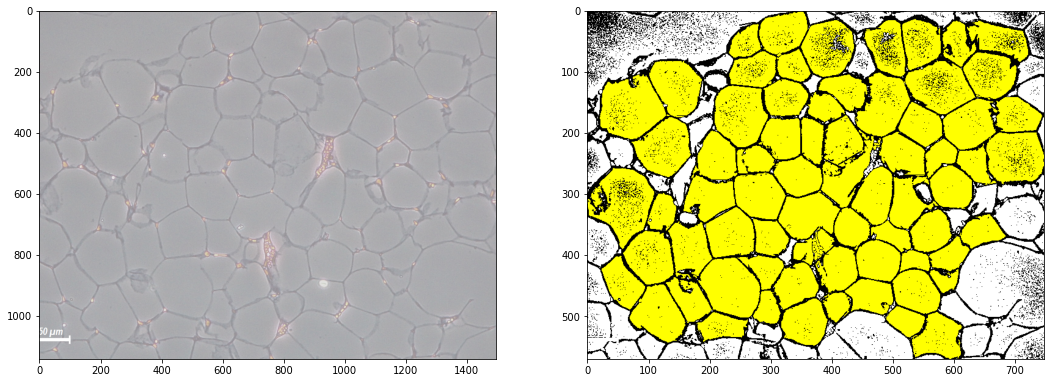

In [6]:
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(1,2,1)
ax.imshow(cut_image[5])
ax = fig.add_subplot(1,2,2)
ax.imshow(cut_mask[5])
plt.show()

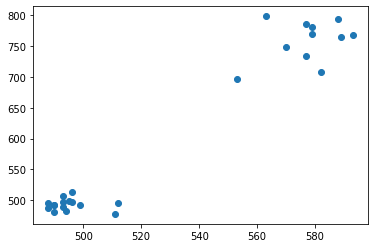

In [7]:
r_lens = [m.shape[0] for m in cut_mask]
c_lens = [m.shape[1] for m in cut_mask]
fig = plt.scatter(r_lens, c_lens)
plt.show()

In [5]:
cut_mask_bool = []
wall_color = [0,0,0]

for c_mask in cut_mask:
    cut_mask_bool.append(np.all(c_mask==wall_color,axis=-1))

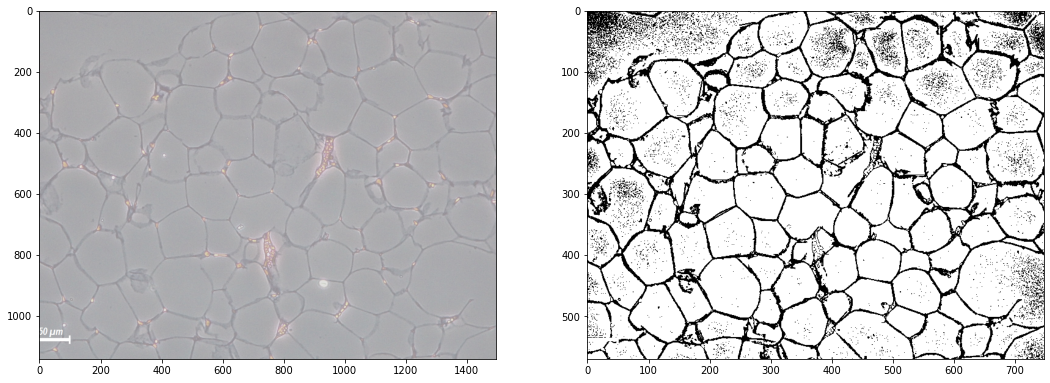

In [9]:
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(1,2,1)
ax.imshow(cut_image[5])
ax = fig.add_subplot(1,2,2)
ax.imshow(cut_mask_bool[5], cmap='binary')
plt.show()

In [6]:
gamma_distorted = []
for img in cut_image:
    gamma_distorted.append(
        (255.0 * (img / 255.0)**(0.5+np.random.rand(1)*2)).astype(np.uint8)
    )

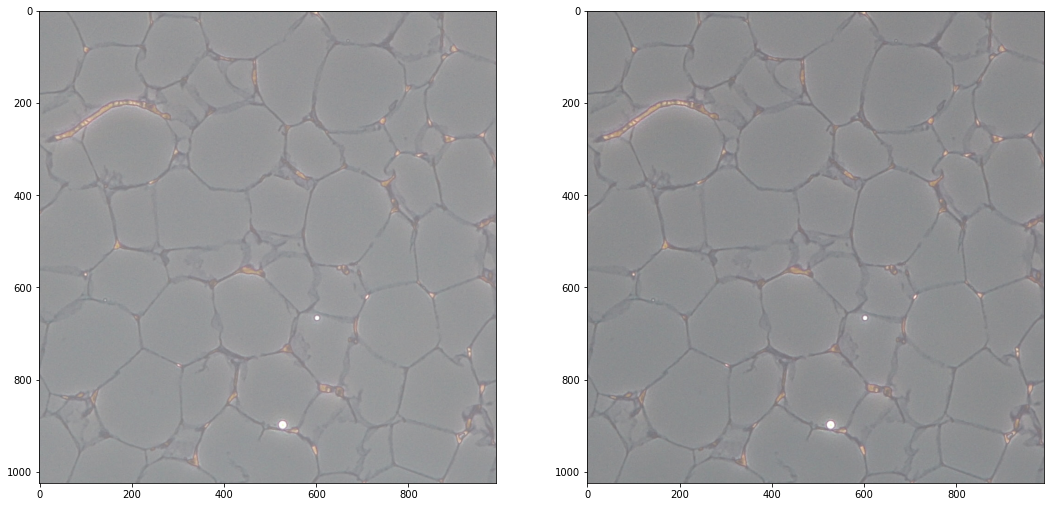

In [11]:
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(1,2,1)
ax.imshow(cut_image[15])
ax = fig.add_subplot(1,2,2)
ax.imshow(gamma_distorted[15])
plt.show()

In [7]:
import scipy.stats
contrast_distorted = []
for img in cut_image:
    cont_factor = 0.5+random.random()*1.5
    mean = scipy.stats.trim_mean(scipy.stats.trim_mean(img, 0.1, axis=1),0.1, axis=0)
    distorted = (img - mean)*cont_factor + mean
    distorted = np.clip(((distorted - np.min(distorted,axis=(0,1)))/(np.max(distorted,axis=(0,1))*0.5))*np.max(img,axis=(0,1)),0,255)
    contrast_distorted.append(distorted.astype(np.uint8))

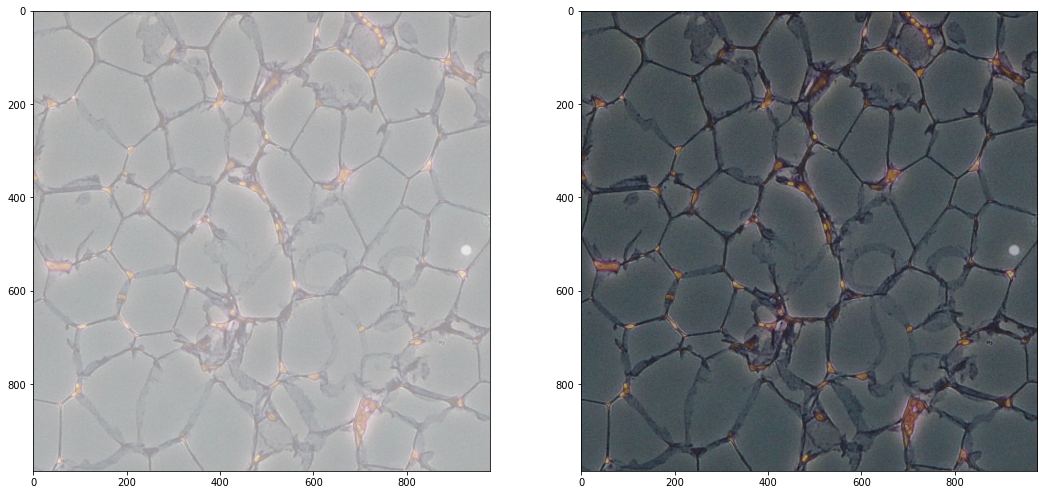

In [13]:
fig = plt.figure(figsize=(18,16))
ax = fig.add_subplot(1,2,1)
ax.imshow(cut_image[11])
ax = fig.add_subplot(1,2,2)
ax.imshow(contrast_distorted[11])
plt.show()

In [8]:
sliced_images = []
sliced_bools = []

all_images = [cut_image, gamma_distorted, contrast_distorted]
i = 0
for img_data in all_images:
    for s_im, s_mb in zip(img_data, cut_mask_bool):
        r = 0
        while r < s_mb.shape[0]-100:
            c = 0
            while c < s_mb.shape[1]-100:
                naive_i = s_im[2*r:2*(r+100),2*c:2*(c+100)]
                naive_i_f = np.flip(naive_i,axis=0)
                naive_b = s_mb[r:r+100,c:c+100]
                naive_b_f = np.flip(naive_b,axis=0)
                sliced_images.extend([
                    naive_i,
                    np.rot90(naive_i, 1),
                    np.rot90(naive_i, 2),
                    np.rot90(naive_i, 3),
                    naive_i_f,
                    np.rot90(naive_i_f, 1),
                    np.rot90(naive_i_f, 2),
                    np.rot90(naive_i_f, 3),
                ])
                sliced_bools.extend([
                    naive_b,
                    np.rot90(naive_b, 1),
                    np.rot90(naive_b, 2),
                    np.rot90(naive_b, 3),
                    naive_b_f,
                    np.rot90(naive_b_f, 1),
                    np.rot90(naive_b_f, 2),
                    np.rot90(naive_b_f, 3),
                ])
                c += random.randint(20,40)

            r += random.randint(20,40)
        i+=1
        print('{0}/{1}'.format(i,3*len(img_data)))

for img in sliced_images:
    if img.dtype != np.uint8 :
        print('something is not uint8')
for bi in sliced_bools:
    if bi.dtype != np.bool :
        print('something is not bool')
print('done')
print('Total:{}'.format(len(sliced_bools)))

1/78
2/78
3/78
4/78
5/78
6/78
7/78
8/78
9/78
10/78
11/78
12/78
13/78
14/78
15/78
16/78
17/78
18/78
19/78
20/78
21/78
22/78
23/78
24/78
25/78
26/78
27/78
28/78
29/78
30/78
31/78
32/78
33/78
34/78
35/78
36/78
37/78
38/78
39/78
40/78
41/78
42/78
43/78
44/78
45/78
46/78
47/78
48/78
49/78
50/78
51/78
52/78
53/78
54/78
55/78
56/78
57/78
58/78
59/78
60/78
61/78
62/78
63/78
64/78
65/78
66/78
67/78
68/78
69/78
70/78
71/78
72/78
73/78
74/78
75/78
76/78
77/78
78/78
done
Total:164296


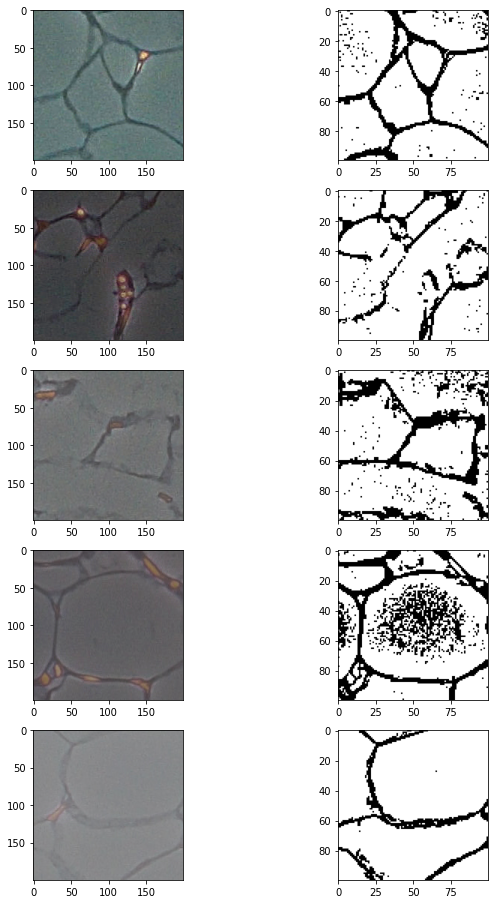

In [15]:
fig = plt.figure(figsize=(10,16))
indices = np.random.randint(0, len(sliced_images),size=5)
for n,idx in enumerate(indices):
    ax1 = fig.add_subplot(5,2,2*n+1)
    ax1.imshow(sliced_images[idx])
    ax2 = fig.add_subplot(5,2,2*n+2)
    ax2.imshow(sliced_bools[idx], cmap='binary')

plt.show()

In [9]:
X_data = np.array(sliced_images)
Y_data = np.array(sliced_bools)
print('X_data shape:{}'.format(X_data.shape))
print('X_data type:{}'.format(X_data.dtype))
print('Y_data shape:{}'.format(Y_data.shape))
print('Y_data type:{}'.format(Y_data.dtype))

X_data shape:(163168, 200, 200, 3)
X_data type:uint8
Y_data shape:(163168, 100, 100)
Y_data type:bool


In [10]:
np.savez('Adipose_dataset', 
        X_train=X_data[:-16000], 
        Y_train=Y_data[:-16000],
        X_test=X_data[16000:],
        Y_test=Y_data[16000:]
        )